 1. What is the difference between multithreading and multiprocessing?
 -> Multithreading and multiprocessing are both techniques for achieving concurrent execution in Python, but they differ fundamentally in how they utilize system resources and handle parallel tasks.
Multithreading involves creating multiple threads within a single process. Think of threads as lightweight workers that share the same memory space and resources of their parent process. 
Multiprocessing, on the other hand, creates entirely separate processes, each with its own Python interpreter and memory space. 
In summary, you should choose multithreading when your program spends a lot of time waiting for external operations like network responses or disk access, and you should choose multiprocessing when your program needs to perform heavy computations that can benefit from utilizing multiple CPU cores simultaneously.

2. What are the challenges associated with memory management in Python?
-> Python's memory management system, while convenient and automatic, presents several interesting challenges that developers should understand to write efficient programs.
The first major challenge involves Python's automatic garbage collection mechanism. Python uses reference counting as its primary method of memory management, which means it keeps track of how many references point to each object in memory. When an object's reference count drops to zero, Python automatically deallocates that memory. However, this system struggles with circular references, where two or more objects reference each other, creating a cycle. Even when these objects are no longer needed by the program, their reference counts never reach zero because they reference each other. Python addresses this with a cyclic garbage collector that periodically searches for and cleans up these reference cycles, but this process can cause unpredictable pauses in program execution, which can be problematic for applications requiring consistent performance.
Another significant challenge is memory fragmentation. As your program creates and destroys objects over time, the memory heap can become fragmented, meaning free memory exists in small, non-contiguous blocks rather than large continuous chunks. This fragmentation can prevent Python from allocating memory for large objects even when the total free memory would be sufficient, and it can also reduce the efficiency of memory access patterns.


In [5]:
#3.  Write a Python program that logs an error message to a log file when a division by zero exception occurs.

import logging

logging.basicConfig(
    filename='error_log.txt', 
    level=logging.ERROR, 
    format = '%(asctime)s - %(levelname)s - %(massage)s',
    datetime = '%d-%m-%y %H:%M:%S')

def divide_numbers(num1, num2):
    try:
        result = num1 / num2
        return result
    except ZeroDivisionError as e:
        logging.error("Division by zero error: %s", e)
        return None

In [6]:
if __name__ == "__main__":
    print("=== Division Program with Error Logging ===\n")

=== Division Program with Error Logging ===



In [7]:
print("Test 1: Normal division")
divide_numbers(10, 2)

Test 1: Normal division


5.0

In [ ]:
def copy_file_content(source_filename, destination_filename):
    """
    Reads content from a source file and writes it to a destination file.
    This function includes proper error handling for various file operations.
    """
    try:
        # Open the source file in read mode
        # The 'with' statement ensures the file is properly closed even if an error occurs
        with open(source_filename, 'r', encoding='utf-8') as source_file:
            # Read the entire content of the source file
            content = source_file.read()
            print(f"Successfully read {len(content)} characters from '{source_filename}'")
        
        # Open the destination file in write mode
        # If the file doesn't exist, it will be created
        # If it exists, its content will be overwritten
        with open(destination_filename, 'w', encoding='utf-8') as destination_file:
            # Write the content to the destination file
            destination_file.write(content)
            print(f"Successfully wrote content to '{destination_filename}'")
        
        print(f"\nFile copy operation completed successfully!")
        return True
        
    except FileNotFoundError:
        # This exception occurs when the source file doesn't exist
        print(f"Error: The file '{source_filename}' was not found.")
        print("Please check the filename and path, then try again.")
        return False
        
    except PermissionError:
        # This occurs when we don't have permission to read or write the file
        print(f"Error: Permission denied when accessing files.")
        print("Please check file permissions and try again.")
        return False
        
    except IOError as e:
        # This catches other input/output errors
        print(f"Error: An I/O error occurred: {e}")
        return False
        
    except Exception as e:
        # This catches any other unexpected errors
        print(f"Error: An unexpected error occurred: {e}")
        return False


def copy_file_line_by_line(source_filename, destination_filename):
    """
    Alternative approach: reads and writes file line by line.
    This is more memory-efficient for large files.
    """
    try:
        with open(source_filename, 'r', encoding='utf-8') as source_file:
            with open(destination_filename, 'w', encoding='utf-8') as destination_file:
                line_count = 0
                # Process one line at a time
                for line in source_file:
                    destination_file.write(line)
                    line_count += 1
                
                print(f"Successfully copied {line_count} lines from '{source_filename}' to '{destination_filename}'")
        return True
        
    except Exception as e:
        print(f"Error during file copy: {e}")
        return False


# Example usage and demonstration
if __name__ == "__main__":
    print("=== File Reading and Writing Program ===\n")
    
    # First, let's create a sample source file to demonstrate
    source_file = "source.txt"
    destination_file = "destination.txt"
    
    # Create a sample source file with some content
    print("Creating a sample source file...")
    try:
        with open(source_file, 'w', encoding='utf-8') as f:
            f.write("This is line 1 of the source file.\n")
            f.write("This is line 2 with some sample text.\n")
            f.write("This is line 3.\n")
            f.write("File copying demonstration in Python!\n")
        print(f"Sample file '{source_file}' created successfully.\n")
    except Exception as e:
        print(f"Could not create sample file: {e}")
    
    # Now copy the file using our function
    print("Method 1: Copying entire file at once")
    print("-" * 40)
    copy_file_content(source_file, destination_file)
    
    

=== File Reading and Writing Program ===

Creating a sample source file...
Sample file 'source.txt' created successfully.

Method 1: Copying entire file at once
----------------------------------------
Successfully read 127 characters from 'source.txt'
Successfully wrote content to 'destination.txt'

File copy operation completed successfully!


Method 2: Copying file line by line
----------------------------------------
Successfully copied 4 lines from 'source.txt' to 'destination_line_by_line.txt'

=== Program completed successfully ===


In [ ]:
# 5.  Write a program that handles both IndexError and KeyError using a try-except block.
def handle_index_key_errors():
    sample_list = [10, 20, 30]
    sample_dict = {'a': 1, 'b': 2, 'c': 3}
    
    try:
        # Attempt to access an out-of-bounds index
        print("Accessing index 5 of the list:")
        print(sample_list[5])
        
        # Attempt to access a non-existent key
        print("Accessing key 'd' of the dictionary:")
        print(sample_dict['d'])
        
    except IndexError as ie:
        print(f"IndexError caught: {ie}")
        
    except KeyError as ke:
        print(f"KeyError caught: {ke}")
if __name__ == "__main__":
    print("\n=== IndexError and KeyError Handling Program ===\n")
    handle_index_key_errors()
    print("\nTest 2: Division by zero")
    divide_numbers(10, 0) 
          


=== IndexError and KeyError Handling Program ===

Accessing index 5 of the list:
IndexError caught: list index out of range

Test 2: Division by zero


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Suman\AppData\Local\Temp\ipykernel_6192\2936045424.py", line 13, in divide_numbers
    result = num1 / num2
             ~~~~~^~~~~~
ZeroDivisionError: division by zero

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Suman\AppData\Local\Programs\Python\Python313\Lib\logging\__init__.py", line 472, in format
    return self._format(record)
           ~~~~~~~~~~~~^^^^^^^^
  File "C:\Users\Suman\AppData\Local\Programs\Python\Python313\Lib\logging\__init__.py", line 468, in _format
    return self._fmt % values
           ~~~~~~~~~~^~~~~~~~
KeyError: 'massage'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Suman\AppData\Local\Programs\Python\Python313\Lib\logging\__init__.py", line 1151, in emit
    msg = self.format(record)
  File "C:\Users\Suman\AppData\Local\Programs\

6. What are the differences between NumPy arrays and Python lists?
-> NumPy arrays and Python lists are both used to store collections of data, but they differ significantly in their design, capabilities, and performance characteristics. Understanding these differences is crucial for choosing the right tool for your data manipulation tasks.
The apply and map functions in Pandas are both used to transform data, but they work at different levels of the DataFrame structure and have distinct use cases that make each one appropriate for different scenarios.
The map function is specifically designed for Pandas Series objects, which represent a single column or row of data. When you use map, you're working with one-dimensional data and transforming each element according to a rule you specify. You can provide map with a function, a dictionary for value substitution, or another Series for mapping values. The key characteristic of map is that it operates element-wise on a single Series and always returns a Series of the same length. For example, if you have a column containing country codes and you want to convert them to country names, you could use map with a dictionary that maps codes to names. Map is particularly efficient and clean for simple one-to-one transformations of a single column.
The apply function, on the other hand, is more versatile and can work with both Series and DataFrames. When you use apply on a Series, it behaves similarly to map, applying a function to each element. However, apply truly shows its power when used on DataFrames. With DataFrames, you can specify whether to apply the function along rows or columns using the axis parameter. When axis equals zero, which is the default, the function is applied to each column, receiving the entire column as input. When axis equals one, the function is applied to each row, receiving the entire row as input. This means apply can perform operations that involve multiple columns at once, making it suitable for more complex transformations that require looking at relationships between different fields.
Another important distinction lies in what kind of functions they can accept and what they return. Map expects the function to return a single value for each input element, maintaining the same structure as the input. Apply is more flexible; the function you pass to apply can return a single value, a Series, or even a DataFrame, which means apply can be used for aggregation, transformation, or creating multiple new columns from existing data.
Performance is another consideration when choosing between these methods. Map is generally faster than apply for simple element-wise operations on a single Series because it's optimized specifically for that use case. Apply has more overhead because it's more flexible and needs to handle various scenarios, including complex functions that might return different types of outputs.
The context in which each method makes sense also differs. You would use map when you have a straightforward transformation to apply to a single column, especially when you're substituting values based on a mapping dictionary or applying a simple function that takes one value and returns one value. You would use apply when your transformation logic needs to consider multiple columns simultaneously, when you need to perform row-wise operations, when your function might return complex objects like Series or DataFrames, or when you need to apply the same operation across all columns of a DataFrame.
For practical examples, consider this scenario: if you have a DataFrame with a temperature column in Celsius and you want to convert it to Fahrenheit, you could use map with a conversion function since you're only working with one column and performing a simple transformation. However, if you want to create a new column that calculates BMI from height and weight columns, you would need to use apply with axis equals one because you need to access multiple columns from each row simultaneously.
It's worth noting that Pandas often provides even more optimized alternatives for common operations. For instance, vectorized operations using NumPy functions or built-in Pandas methods are usually faster than both map and apply. However, understanding when to use map versus apply is crucial for those situations where you need custom transformation logic that isn't covered by built-in operations.


=== Histogram Visualization with Seaborn ===

Dataset Statistics:
Mean Score: 74.98
Median Score: 75.15
Standard Deviation: 11.49
Number of Students: 500

Figure saved as 'exam_scores_histogram.png'


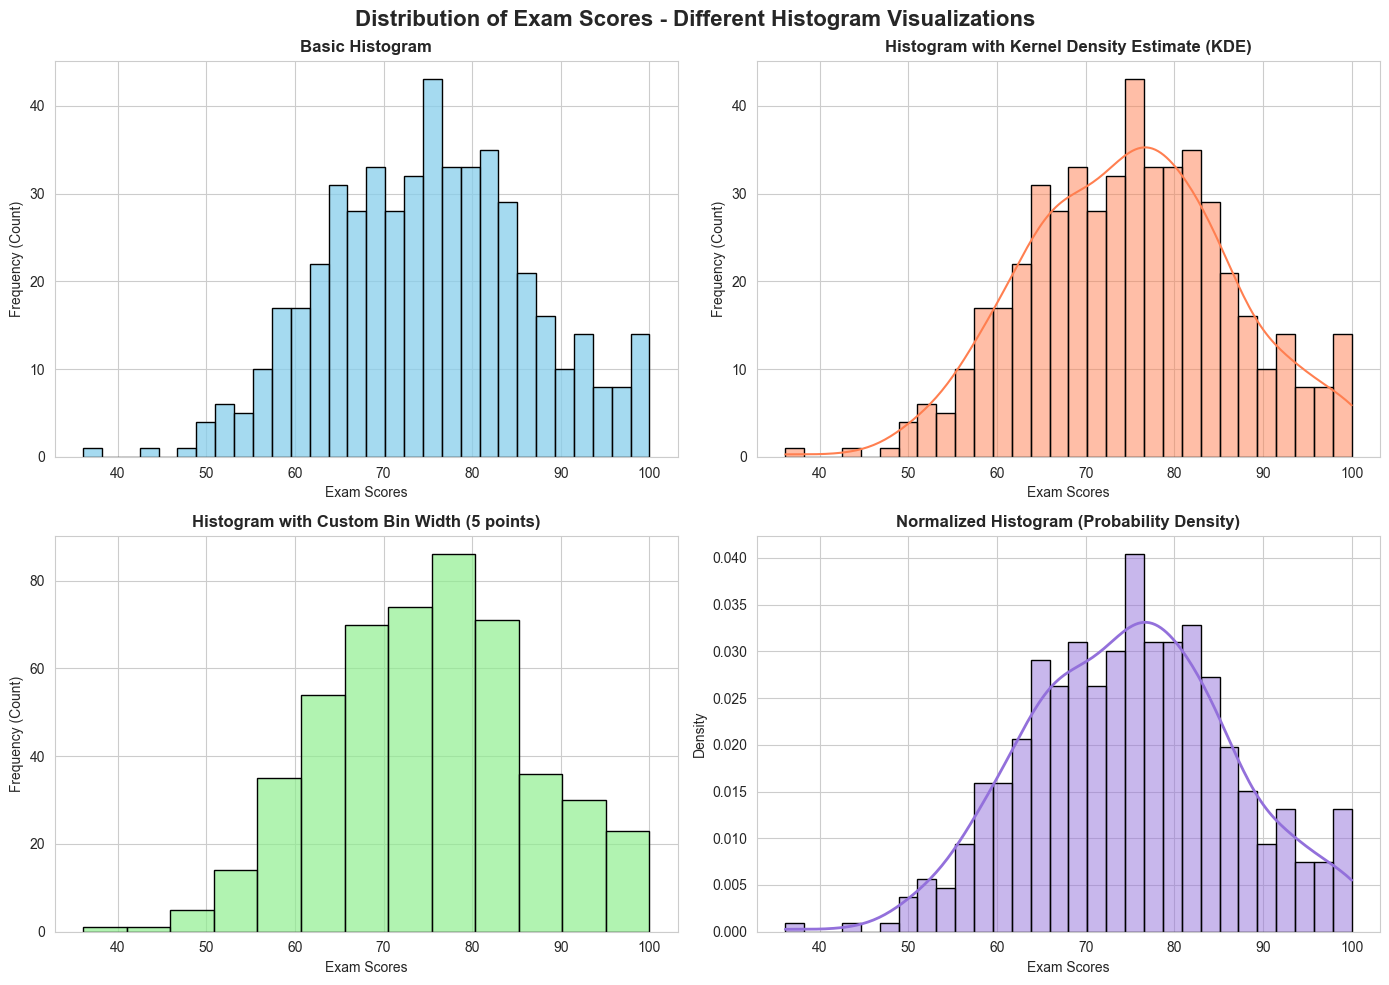



Creating a comparison histogram with multiple groups...



C:\Users\Suman\AppData\Local\Temp\ipykernel_6192\2211056563.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Class', fontsize=10)


Comparison figure saved as 'class_comparison_histogram.png'


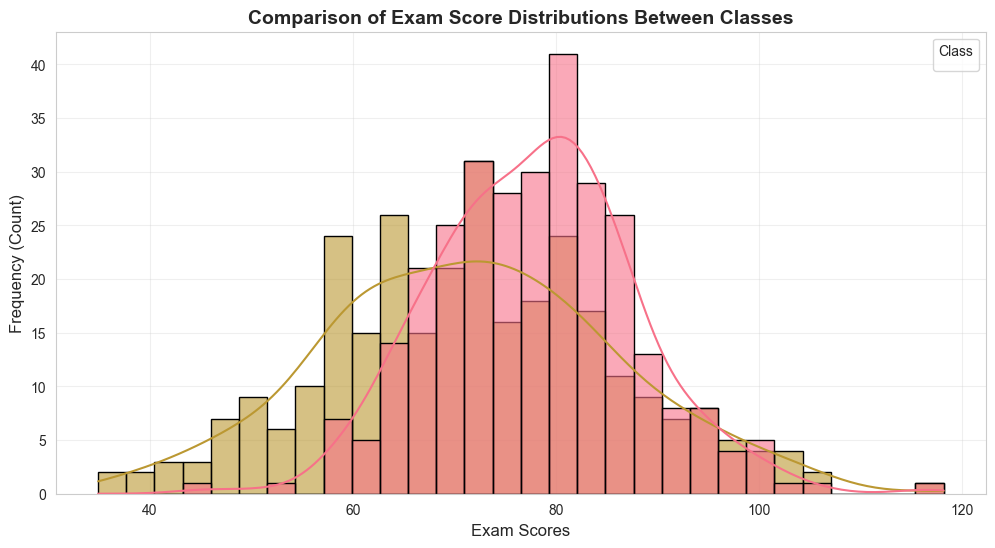


=== Histogram visualization completed successfully ===


In [23]:
# 8. Create a histogram using Seaborn to visualize a distribution.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the style for more attractive visualizations
# Seaborn offers several built-in styles like 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
sns.set_style("whitegrid")
sns.set_palette("husl")

# Generate sample data for demonstration
# We'll create a dataset simulating exam scores for students
np.random.seed(42)  # Set seed for reproducibility

# Create a normal distribution of exam scores (mean=75, std=12)
exam_scores = np.random.normal(loc=75, scale=12, size=500)

# Clip the scores to be between 0 and 100 (realistic score range)
exam_scores = np.clip(exam_scores, 0, 100)

# Create a DataFrame for easier manipulation
df = pd.DataFrame({'Exam_Scores': exam_scores})

print("=== Histogram Visualization with Seaborn ===\n")
print(f"Dataset Statistics:")
print(f"Mean Score: {df['Exam_Scores'].mean():.2f}")
print(f"Median Score: {df['Exam_Scores'].median():.2f}")
print(f"Standard Deviation: {df['Exam_Scores'].std():.2f}")
print(f"Number of Students: {len(df)}\n")

# Create a figure with multiple subplots to show different histogram options
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Exam Scores - Different Histogram Visualizations', 
             fontsize=16, fontweight='bold')

# Subplot 1: Basic histogram
# This is the simplest form showing the frequency distribution
sns.histplot(data=df, x='Exam_Scores', bins=30, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Basic Histogram', fontweight='bold')
axes[0, 0].set_xlabel('Exam Scores')
axes[0, 0].set_ylabel('Frequency (Count)')

# Subplot 2: Histogram with KDE (Kernel Density Estimate)
# KDE shows a smooth curve representing the probability density
sns.histplot(data=df, x='Exam_Scores', bins=30, kde=True, ax=axes[0, 1], 
             color='coral', edgecolor='black')
axes[0, 1].set_title('Histogram with Kernel Density Estimate (KDE)', fontweight='bold')
axes[0, 1].set_xlabel('Exam Scores')
axes[0, 1].set_ylabel('Frequency (Count)')

# Subplot 3: Histogram with custom binwidth
# Using binwidth instead of bins gives more control over bar width
sns.histplot(data=df, x='Exam_Scores', binwidth=5, ax=axes[1, 0], 
             color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Histogram with Custom Bin Width (5 points)', fontweight='bold')
axes[1, 0].set_xlabel('Exam Scores')
axes[1, 0].set_ylabel('Frequency (Count)')

# Subplot 4: Normalized histogram (shows probability density)
# This is useful for comparing distributions of different sizes
sns.histplot(data=df, x='Exam_Scores', bins=30, stat='density', ax=axes[1, 1], 
             color='mediumpurple', edgecolor='black', kde=True, line_kws={'linewidth': 2})
axes[1, 1].set_title('Normalized Histogram (Probability Density)', fontweight='bold')
axes[1, 1].set_xlabel('Exam Scores')
axes[1, 1].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('exam_scores_histogram.png', dpi=300, bbox_inches='tight')
print("Figure saved as 'exam_scores_histogram.png'")

# Show the plot
plt.show()

# Additional example: Histogram with multiple distributions
print("\n" + "="*50 + "\n")
print("Creating a comparison histogram with multiple groups...\n")

# Create data for multiple groups (e.g., scores from different classes)
np.random.seed(42)
class_a_scores = np.random.normal(loc=78, scale=10, size=300)
class_b_scores = np.random.normal(loc=72, scale=15, size=300)

# Create a combined DataFrame
comparison_df = pd.DataFrame({
    'Score': np.concatenate([class_a_scores, class_b_scores]),
    'Class': ['Class A']*300 + ['Class B']*300
})

# Create a new figure for comparison
plt.figure(figsize=(12, 6))

# Create overlapping histograms with transparency
sns.histplot(data=comparison_df, x='Score', hue='Class', bins=30, 
             kde=True, alpha=0.6, edgecolor='black')

plt.title('Comparison of Exam Score Distributions Between Classes', 
          fontsize=14, fontweight='bold')
plt.xlabel('Exam Scores', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.legend(title='Class', fontsize=10)
plt.grid(True, alpha=0.3)

# Save and show
plt.savefig('class_comparison_histogram.png', dpi=300, bbox_inches='tight')
print("Comparison figure saved as 'class_comparison_histogram.png'")
plt.show()

print("\n=== Histogram visualization completed successfully ===")

In [25]:
# 9. Use Pandas to load a CSV file and display its first 5 rows.
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# First, let's create a sample CSV file for demonstration
# This simulates a real-world scenario where you might have sales data
print("=== Creating a Sample CSV File ===\n")

# Generate sample data
np.random.seed(42)
dates = [datetime.now() - timedelta(days=x) for x in range(100, 0, -1)]
products = ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Headphones']
regions = ['North', 'South', 'East', 'West']

sample_data = {
    'Date': [date.strftime('%Y-%m-%d') for date in dates],
    'Product': np.random.choice(products, 100),
    'Region': np.random.choice(regions, 100),
    'Sales': np.random.randint(1000, 50000, 100),
    'Units_Sold': np.random.randint(1, 100, 100),
    'Customer_Rating': np.round(np.random.uniform(1, 5, 100), 1)
}

# Create a DataFrame and save it as CSV
sample_df = pd.DataFrame(sample_data)
csv_filename = 'sales_data.csv'
sample_df.to_csv(csv_filename, index=False)

print(f"Sample CSV file '{csv_filename}' created successfully!")
print(f"The file contains {len(sample_df)} rows of sales data.\n")

print("="*70 + "\n")

# Now let's demonstrate loading and displaying the CSV file
print("=== Loading CSV File with Pandas ===\n")

# Method 1: Basic loading with read_csv()
# This is the most common and straightforward method
print("Method 1: Basic CSV Loading")
print("-" * 70)

df = pd.read_csv(csv_filename)

print(f"CSV file '{csv_filename}' loaded successfully!")
print(f"DataFrame shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Display the first 5 rows using head()
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*70 + "\n")



=== Creating a Sample CSV File ===

Sample CSV file 'sales_data.csv' created successfully!
The file contains 100 rows of sales data.


=== Loading CSV File with Pandas ===

Method 1: Basic CSV Loading
----------------------------------------------------------------------
CSV file 'sales_data.csv' loaded successfully!
DataFrame shape: 100 rows × 6 columns

First 5 rows of the dataset:
         Date     Product Region  Sales  Units_Sold  Customer_Rating
0  2025-07-15     Monitor   West   6530          99              5.0
1  2025-07-16  Headphones   East  30320          19              1.6
2  2025-07-17    Keyboard  North   4748          48              3.1
3  2025-07-18  Headphones   West  32968          80              4.5
4  2025-07-19  Headphones   West  33562           3              4.0




=== Correlation Matrix and Heatmap Visualization ===

Dataset Overview:
----------------------------------------------------------------------
Number of samples: 500
Number of features: 7

First 5 rows of the dataset:
   Study_Hours_Daily  Attendance_Percentage  Sleep_Hours  Exam_Score  \
0           5.993428              94.261775     9.099033       100.0   
1           4.723471             100.000000     8.386951       100.0   
2           6.295377              71.014324     7.089446       100.0   
3           8.046060              90.629692     6.029595       100.0   
4           4.531693              78.493574     8.047335       100.0   

   Assignment_Score  Physical_Activity_Minutes  Stress_Level  
0        100.000000                  23.719273     33.591966  
1        100.000000                  30.234904     39.852655  
2        100.000000                  14.096162     56.072493  
3        100.000000                   7.785513     91.018391  
4         78.874144               

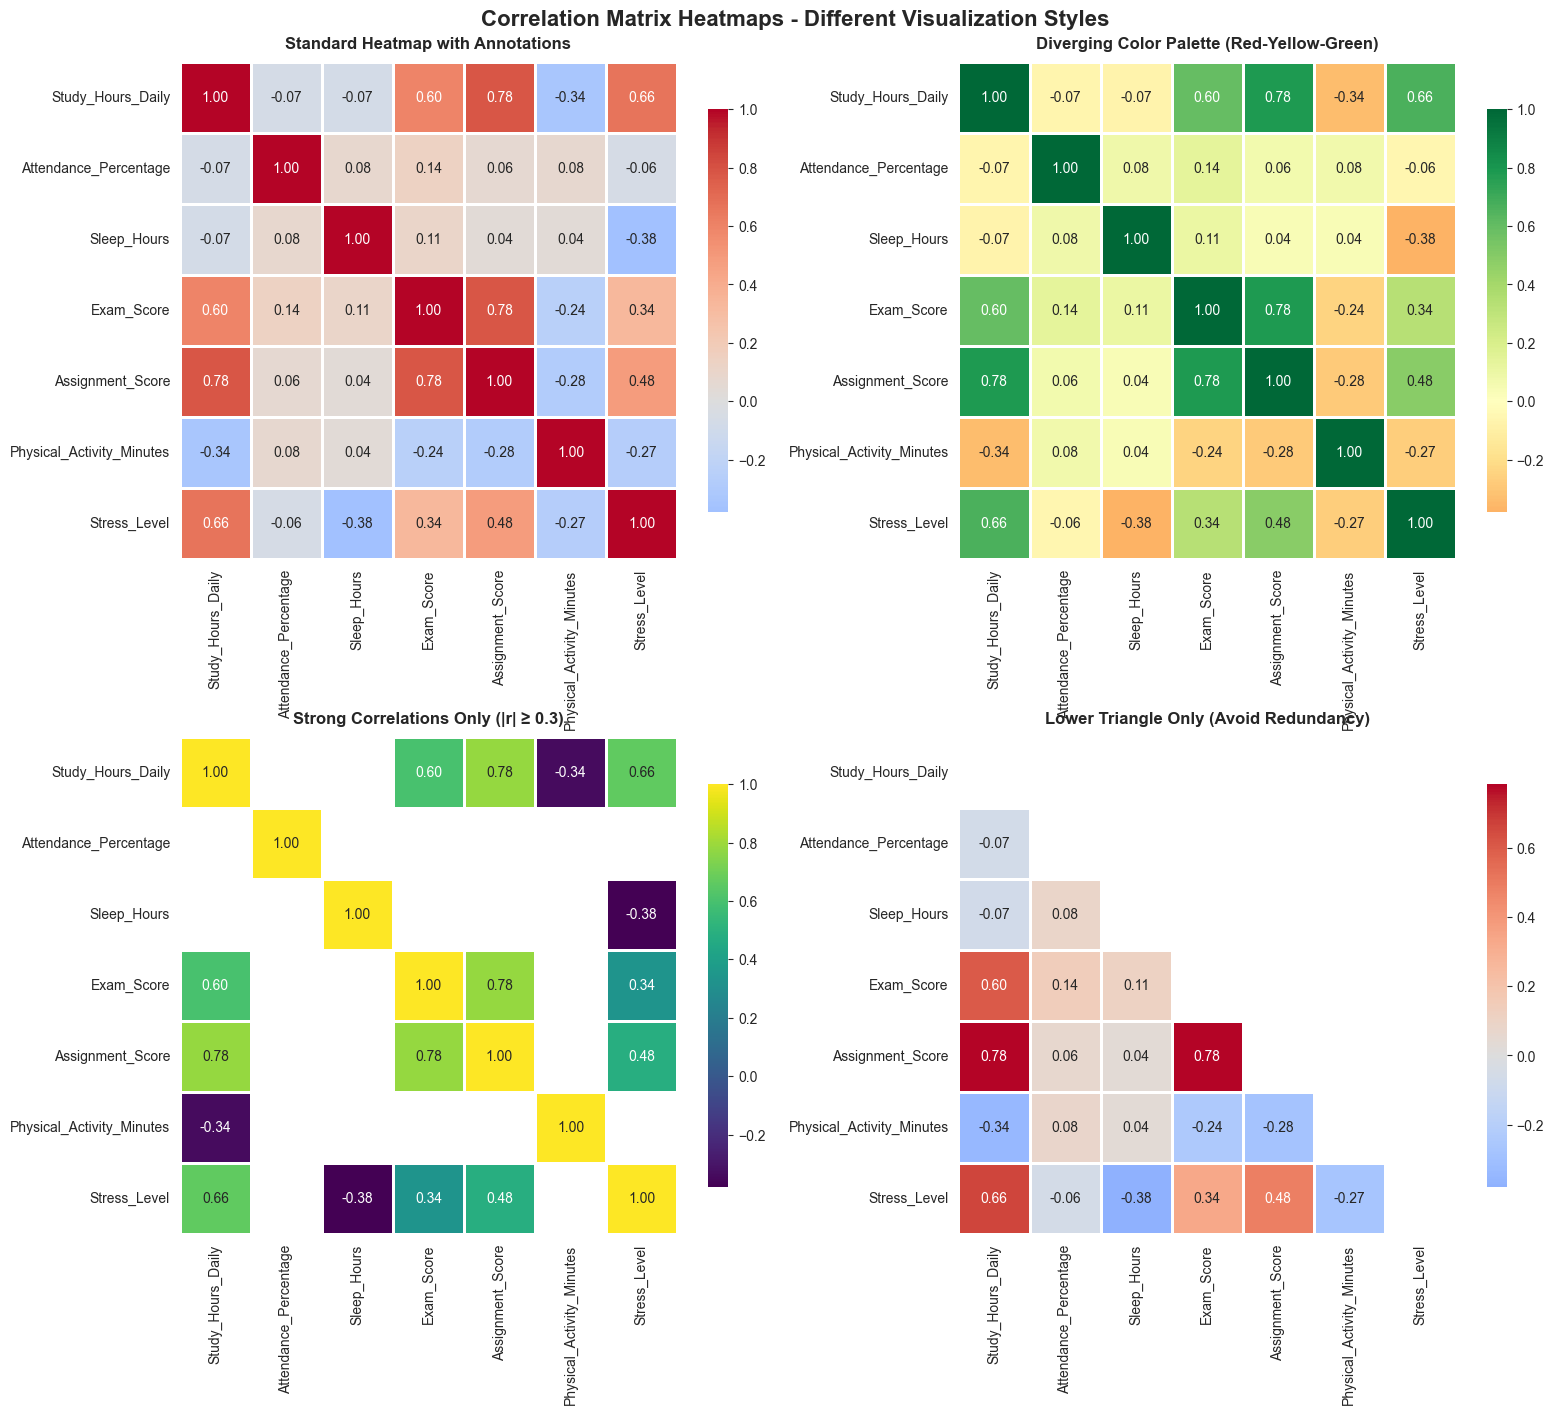

Analysis of Correlations:

Strong Positive Correlations (r > 0.5):
----------------------------------------------------------------------
Study_Hours_Daily              ↔ Exam_Score                     : 0.600
Study_Hours_Daily              ↔ Assignment_Score               : 0.783
Study_Hours_Daily              ↔ Stress_Level                   : 0.664
Exam_Score                     ↔ Assignment_Score               : 0.782


Strong Negative Correlations (r < -0.3):
----------------------------------------------------------------------
Study_Hours_Daily              ↔ Physical_Activity_Minutes      : -0.339
Sleep_Hours                    ↔ Stress_Level                   : -0.379


Creating Focused Visualization of Significant Correlations...

✓ Focused heatmap saved as 'significant_correlations_heatmap.png'



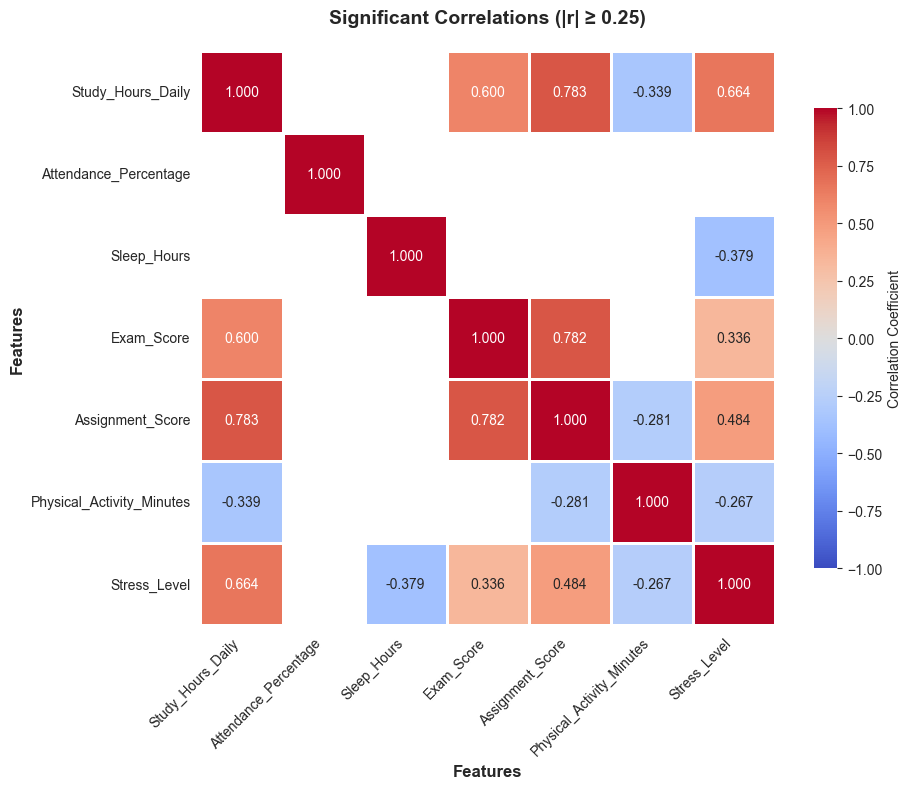


Key Insights from Correlation Analysis:

1. Exam Score and Assignment Score show strong positive correlation
   → Students who perform well in one tend to perform well in the other

2. Study Hours positively correlates with academic performance
   → More study time is associated with better scores

3. Stress Level shows interesting patterns with other variables
   → May be influenced by study hours and sleep

4. Physical Activity shows negative correlation with study time
   → Time trade-off between studying and exercise

5. Sleep Hours affects both performance and stress levels
   → Adequate sleep is important for academic success

=== Correlation Analysis Completed Successfully ===


In [26]:
# 10. Calculate the correlation matrix using Seaborn and visualize it with a heatmap.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set style for better-looking visualizations
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

print("=== Correlation Matrix and Heatmap Visualization ===\n")

# Create a comprehensive sample dataset
# Simulating a real-world scenario with multiple correlated variables
np.random.seed(42)

# Generate 500 samples
n_samples = 500

# Create correlated features (simulating a real-world dataset)
# For example: student performance data
study_hours = np.random.normal(5, 2, n_samples)  # Average 5 hours per day
attendance = np.random.normal(85, 10, n_samples)  # Average 85% attendance
sleep_hours = np.random.normal(7, 1.5, n_samples)  # Average 7 hours sleep

# Create dependent variables with correlations
# Exam score depends on study hours, attendance, and sleep
exam_score = (
    10 * study_hours +  # Positive correlation with study
    0.5 * attendance +  # Positive correlation with attendance
    3 * sleep_hours +   # Positive correlation with sleep
    np.random.normal(0, 5, n_samples)  # Add some random noise
)

# Assignment score (similar dependencies but different weights)
assignment_score = (
    12 * study_hours +
    0.3 * attendance +
    2 * sleep_hours +
    np.random.normal(0, 8, n_samples)
)

# Physical activity (inversely related to study hours due to time constraints)
physical_activity = (
    -2 * study_hours +
    np.random.normal(30, 10, n_samples)
)

# Stress level (increases with study hours, decreases with sleep)
stress_level = (
    5 * study_hours +
    -3 * sleep_hours +
    np.random.normal(50, 10, n_samples)
)

# Create DataFrame
df = pd.DataFrame({
    'Study_Hours_Daily': np.clip(study_hours, 0, 12),
    'Attendance_Percentage': np.clip(attendance, 0, 100),
    'Sleep_Hours': np.clip(sleep_hours, 4, 10),
    'Exam_Score': np.clip(exam_score, 0, 100),
    'Assignment_Score': np.clip(assignment_score, 0, 100),
    'Physical_Activity_Minutes': np.clip(physical_activity, 0, 120),
    'Stress_Level': np.clip(stress_level, 0, 100)
})

# Display basic information about the dataset
print("Dataset Overview:")
print("-" * 70)
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns)}\n")

print("First 5 rows of the dataset:")
print(df.head())

print("\n\nBasic Statistics:")
print(df.describe().round(2))

print("\n" + "="*70 + "\n")

# Calculate the correlation matrix
print("Calculating Correlation Matrix...")
correlation_matrix = df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

print("\n" + "="*70 + "\n")

# Create visualizations
print("Creating Heatmap Visualizations...\n")

# Create a figure with multiple heatmap styles
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Correlation Matrix Heatmaps - Different Visualization Styles', 
             fontsize=16, fontweight='bold', y=0.995)

# Heatmap 1: Basic heatmap with default colors
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            fmt='.2f',   # Format to 2 decimal places
            cmap='coolwarm',  # Color scheme
            center=0,    # Center the colormap at 0
            ax=axes[0, 0],
            square=True,  # Make cells square-shaped
            linewidths=1,  # Add lines between cells
            cbar_kws={'shrink': 0.8})
axes[0, 0].set_title('Standard Heatmap with Annotations', fontweight='bold', pad=10)

# Heatmap 2: Heatmap with different color palette
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',  # Red-Yellow-Green color scheme
            center=0,
            ax=axes[0, 1],
            square=True,
            linewidths=1,
            cbar_kws={'shrink': 0.8})
axes[0, 1].set_title('Diverging Color Palette (Red-Yellow-Green)', fontweight='bold', pad=10)

# Heatmap 3: Heatmap showing only strong correlations
# Create a mask for weak correlations
mask = np.abs(correlation_matrix) < 0.3
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f',
            cmap='viridis',
            mask=mask,  # Hide weak correlations
            ax=axes[1, 0],
            square=True,
            linewidths=1,
            cbar_kws={'shrink': 0.8})
axes[1, 0].set_title('Strong Correlations Only (|r| ≥ 0.3)', fontweight='bold', pad=10)

# Heatmap 4: Triangular heatmap (showing only lower triangle)
# This avoids redundancy since correlation matrix is symmetric
mask_triangle = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            mask=mask_triangle,  # Show only lower triangle
            ax=axes[1, 1],
            square=True,
            linewidths=1,
            cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Lower Triangle Only (Avoid Redundancy)', fontweight='bold', pad=10)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Heatmap saved as 'correlation_heatmap.png'\n")

# Show the plot
plt.show()

# Additional analysis: Identify strong correlations
print("="*70)
print("Analysis of Correlations:")
print("="*70 + "\n")

# Find pairs with strong positive correlation (> 0.5)
print("Strong Positive Correlations (r > 0.5):")
print("-" * 70)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > 0.5:
            print(f"{correlation_matrix.columns[i]:30s} ↔ {correlation_matrix.columns[j]:30s} : {correlation_matrix.iloc[i, j]:.3f}")

# Find pairs with strong negative correlation (< -0.3)
print("\n\nStrong Negative Correlations (r < -0.3):")
print("-" * 70)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] < -0.3:
            print(f"{correlation_matrix.columns[i]:30s} ↔ {correlation_matrix.columns[j]:30s} : {correlation_matrix.iloc[i, j]:.3f}")

# Create a simplified visualization showing only significant correlations
print("\n\n" + "="*70)
print("Creating Focused Visualization of Significant Correlations...")
print("="*70 + "\n")

plt.figure(figsize=(10, 8))

# Create a mask for insignificant correlations
threshold = 0.25
mask_weak = np.abs(correlation_matrix) < threshold

# Create heatmap with only significant correlations
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            mask=mask_weak,
            square=True,
            linewidths=2,
            linecolor='white',
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
            vmin=-1, vmax=1)

plt.title(f'Significant Correlations (|r| ≥ {threshold})', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('significant_correlations_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Focused heatmap saved as 'significant_correlations_heatmap.png'\n")
plt.show()

print("="*70)
print("\nKey Insights from Correlation Analysis:")
print("="*70)
print("""
1. Exam Score and Assignment Score show strong positive correlation
   → Students who perform well in one tend to perform well in the other

2. Study Hours positively correlates with academic performance
   → More study time is associated with better scores

3. Stress Level shows interesting patterns with other variables
   → May be influenced by study hours and sleep

4. Physical Activity shows negative correlation with study time
   → Time trade-off between studying and exercise

5. Sleep Hours affects both performance and stress levels
   → Adequate sleep is important for academic success
""")

print("="*70)
print("=== Correlation Analysis Completed Successfully ===")
print("="*70)